## 3D ERT arrays

In [27]:
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

In [28]:
scheme = pg.DataContainerERT()
scheme.createSensor([0, 0, 0])
scheme.createSensor([1, 0, 0])
scheme.createSensor([2, 0, 0])
scheme.createSensor([3, 0, 0])
scheme.createSensor([0, 1, 0])
scheme.createSensor([1, 1, 0])
scheme.createSensor([2, 1, 0])
scheme.createSensor([3, 1, 0])
scheme.createFourPointData(scheme.size(), 0, 1, 2, 3)
scheme.createFourPointData(scheme.size(), 0, 1, 4, 5)
scheme.createFourPointData(scheme.size(), 0, 4, 1, 5)
scheme.createFourPointData(scheme.size(), 0, 4, 2, 6)
scheme.createFourPointData(scheme.size(), 0, 4, 3, 7)
scheme["k"] = ert.geometricFactors(scheme, dim=3)
print(scheme)
print(scheme["k"])

Data: Sensors: 8 data: 5, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'valid']
5 [-18.849555921538762, 10.72606824533795, 10.72606824533795, 59.51518546006079, 183.65907399985898]


In [29]:
world = mt.createWorld(start=[-2, -2, -5], end=[5, 3, 0], worldMarker=True)
pl, _ = pg.show(world)

BokehModel(combine_events=True, render_bundle={'docs_json': {'c7495cfe-a25a-4471-bea4-d4a1ac4eaf1c': {'defs': …

In [30]:
for sen in scheme.sensors():
    world.createNode(sen, marker=-99)
    world.createNode(sen-pg.Pos(0, 0.1))
    
mesh = mt.createMesh(world, area=0.01)
print(mesh)
pl, _ = pg.show(mesh, style="wireframe")

Mesh: Nodes: 6248 Cells: 32323 Boundaries: 66620


BokehModel(combine_events=True, render_bundle={'docs_json': {'8eb284bb-b5e9-4855-8273-dc380c84e34e': {'defs': …

In [31]:
fop = ert.ERTModelling(verbose=False)
fop.setData(scheme)
fop.setMesh(mesh)
model = pg.Vector(mesh.cellCount(), 1.0)
fop.createJacobian(model)

06/06/23 - 09:46:32 - pyGIMLi - INFO - Found 1 regions.
06/06/23 - 09:46:32 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/06/23 - 09:46:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/06/23 - 09:46:38 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 46792 Cells: 258584 Boundaries: 266480


In [36]:
ind = 4
sens = fop.jacobian()[ind]
mesh["sens"] = sens/mesh.cellSizes()
lsens = pg.utils.logDropTol(mesh["sens"], 1e-2)
mesh["lsens"] = lsens / max(normsens)
mesh["asens"] = pg.abs(mesh["lsens"])
pg.show(mesh, label="lsens", cMap="bwr", backend="trame",
        filter={"threshold": dict(value=0.1, scalars="asens")})

Widget(value="<iframe src='http://localhost:61533/index.html?ui=P_0x17af39de400_15&reconnect=auto' style='widt…

(<pyvista.plotting.plotting.Plotter at 0x17af39de400>, None)

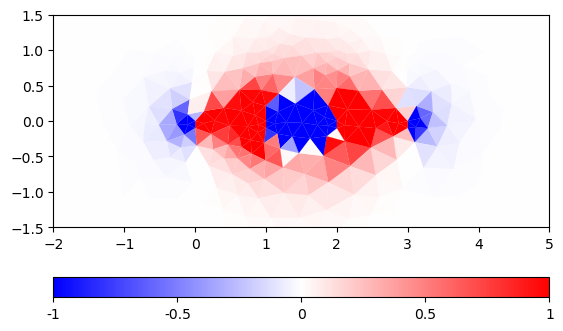

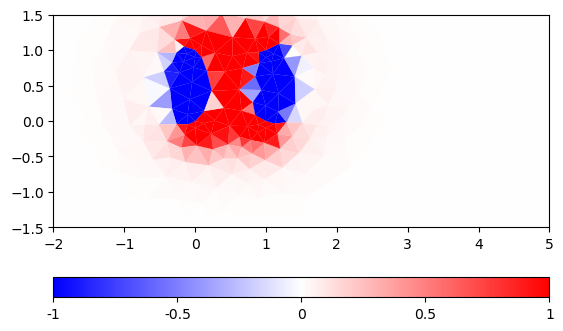

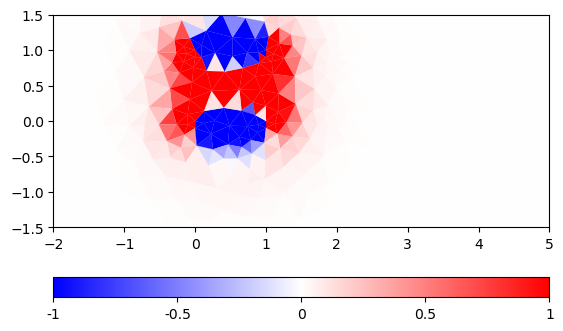

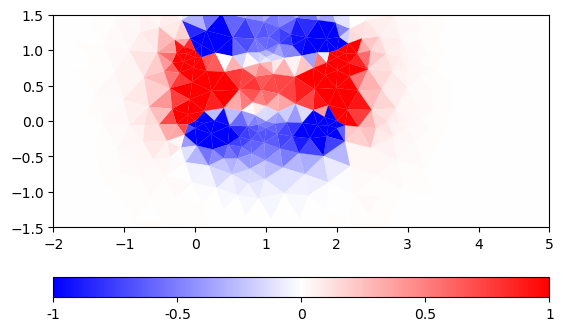

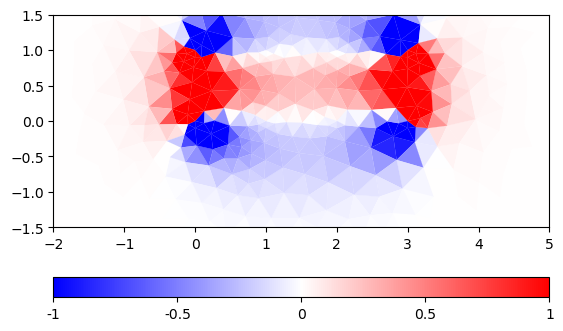

In [34]:
for ind in range(scheme.size()):
    sens = fop.jacobian()[ind]
    mesh["sens"] = sens/mesh.cellSizes()
    surface = mt.extractUpperSurface2dMesh(mesh)
    ax, cb = pg.show(surface, "sens", cMin=-1, cMax=1, cMap="bwr")
    ax.set_ylim(-1.5, 1.5)